# Logistic Regression Practice Exercise
## Chemotherapy for Stage B/C colon cancer
Description
These are data from one of the first successful trials of adjuvant chemotherapy for colon cancer. Levamisole is a low-toxicity compound previously used to treat worm infestations in animals; 5-FU is a moderately toxic (as these things go) chemotherapy agent. There are two records per person, one for recurrence and one for death

**Attribute Information**
- id:	id
- study:	1 for all patients
- sex:	1=male
- age:	in years
- obstruct:	obstruction of colon by tumour
- perfor:	perforation of colon
- adhere:	adherence to nearby organs
- nodes:	number of lymph nodes with detectable cancer
- time:	days until event or censoring
- status:	censoring status
- differ:	differentiation of tumour (1=well, 2=moderate, 3=poor)
- extent:	Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures)
- surg:	time from surgery to registration (0=short, 1=long)
- node4:	more than 4 positive lymph nodes
- etype:	event type: 1=recurrence,2=death

**Loading Libraries**

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**Question 1: Import the Dataset**

In [4]:
df=pd.read_csv('1. Pratice session colon.csv',index_col=0)

In [5]:
df.head(2)

,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
1,1,1,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2
2,1,1,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

**Question 2: Get the Dimensionality of the Dataset.**

In [6]:
df.shape

(1858, 15)

**Question 3: How many Missing Values are there? Drop all missing values.**

In [7]:
print('No of missing values in the Dataset:\n',df.isnull().sum())

No of missing values in the Dataset:
 id           0
study        0
sex          0
age          0
obstruct     0
perfor       0
adhere       0
nodes       36
status       0
differ      46
extent       0
surg         0
node4        0
time         0
etype        0
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id          0
study       0
sex         0
age         0
obstruct    0
perfor      0
adhere      0
nodes       0
status      0
differ      0
extent      0
surg        0
node4       0
time        0
etype       0
dtype: int64

**Question 4: Generate the five point summary of the data set.**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1776.0,466.506757,269.321338,1.0,234.75,466.5,700.25,929.0
study,1776.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
sex,1776.0,0.518018,0.499816,0.0,0.00,1.0,1.00,1.0
age,1776.0,59.810811,11.911137,18.0,53.00,61.0,69.00,85.0
obstruct,1776.0,0.192568,0.394427,0.0,0.00,0.0,0.00,1.0
perfor,1776.0,0.030405,0.171748,0.0,0.00,0.0,0.00,1.0
adhere,1776.0,0.144144,0.351335,0.0,0.00,0.0,0.00,1.0
nodes,1776.0,3.663288,3.539129,0.0,1.00,2.0,5.00,33.0
status,1776.0,0.493243,0.500095,0.0,0.00,0.0,1.00,1.0
differ,1776.0,2.061937,0.510833,1.0,2.00,2.0,2.00,3.0


**Question 5: How many levels are there in the Dependent Variable?**

In [11]:
df['etype'].value_counts()

2    888
1    888
Name: etype, dtype: int64

**Question 6: With reference to the previous question, plot the levels of the dependent variable in a plot of your choice.**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='etype', ylabel='count'>

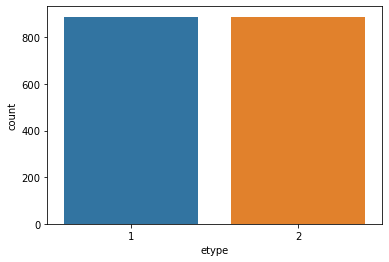

In [12]:
sns.countplot(df['etype'])

**Question 7: Drop the dependent variable from the Data Set and store it seperately. Then split your data into train and test data sets. The test data size should be 30% of the total data. Use random_state=7.**

In [13]:
X=df.drop('etype',axis=1)
y=df.pop('etype')


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=7)

**Question 8: Formulate a logistic regression model on the train data.**

In [15]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

**Question 9: Get the Model Score.**

In [16]:
print('Model score: ',model.score(X_test,y_test))

Model score:  0.5722326454033771


**Question 10: Generate the Confusion Matrix and Classification Report. What are your observations and recommendations?**

In [17]:
ypredict=model.predict(X_test)

In [18]:
metrics.confusion_matrix(y_test,ypredict)

array([[142, 116],
       [112, 163]])

In [19]:
print(metrics.classification_report(y_test,ypredict))

              precision    recall  f1-score   support

           1       0.56      0.55      0.55       258
           2       0.58      0.59      0.59       275

    accuracy                           0.57       533
   macro avg       0.57      0.57      0.57       533
weighted avg       0.57      0.57      0.57       533

